In [2]:
#@title ALLERGEN DETECTION { run: "auto", vertical-output: true, display-mode: "form" }
#@title  { run: "auto", vertical-output: true }
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import ipywidgets as widgets
import os
import io
Username=widgets.Label('Username') 
display(Username)
text1=widgets.Text()
display(text1)
un= str(text1.value)
btn=widgets.Button(description="Login")
display(btn)
#Login
def login(a):
  print("User Information")
  data = pd.read_csv("User.csv")
  display(data)
btn.on_click(login)

Label(value='Username')

Text(value='')

Button(description='Login', style=ButtonStyle())

User Information


,UserID,Name,Username,Age,Allergen 1,Allergen 2
0,1001,Nathamayil,NN,20,Oil seed,Fish


In [6]:
#Food and Related Allergies
df = pd.read_csv('FoodData.csv')
df.head()

,Class,Type,Group,Food,Allergy
0,Plant origin,Nut and seed,Oil seed,Almond,Nut Allergy
1,Plant origin,Fruit,Pome fruit,Apple,Oral Allergy Syndrome
2,Plant origin,Fruit,Stone fruit,Apricot,Stone Fruit Allergy
3,Plant origin,Vegetable,Composite vegetable,Artichoke,Insulin Allergy
4,Plant origin,Vegetable,Liliaceous vegetable,Asparagus,Allium Allergy


In [7]:
df.describe()

,Class,Type,Group,Food,Allergy
count,184,184,184,184,162
unique,3,14,33,183,39
top,Plant origin,Vegetable,Cruciferous vegetable,Peas,Legume Allergy
freq,146,64,15,2,14


<AxesSubplot:title={'center':'Class Distribution'}>

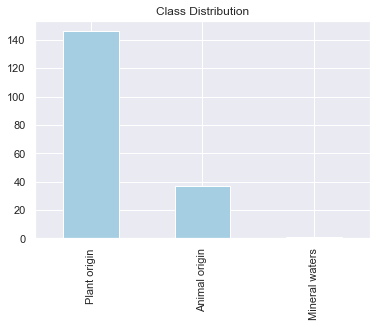

In [8]:
#proportion of the class distrubution
df['Class'].value_counts().plot(kind = 'bar', title = 'Class Distribution')

<AxesSubplot:title={'center':'Class Distribution for class'}, ylabel='Class'>

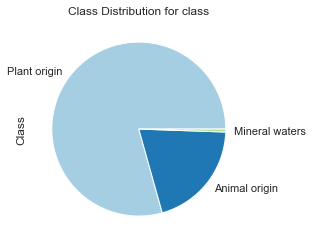

In [9]:
df['Class'].value_counts().plot(kind = 'pie', title = 'Class Distribution for class')

<AxesSubplot:title={'center':'Class Distribution for Type'}>

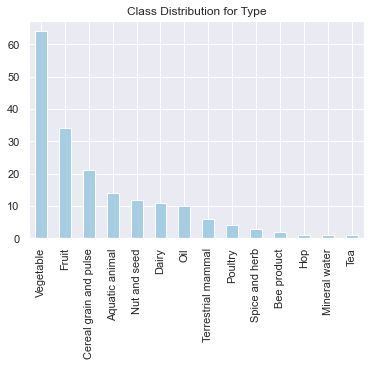

In [10]:
df['Type'].value_counts().plot(kind = 'bar', title = 'Class Distribution for Type')

<AxesSubplot:title={'center':'Class Distribution'}, ylabel='Type'>

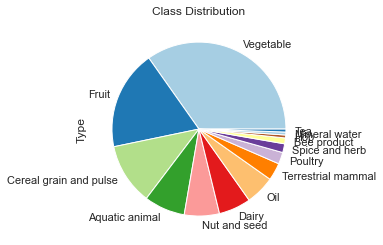

In [11]:
df['Type'].value_counts().plot(kind = 'pie', title = 'Class Distribution')

<AxesSubplot:title={'center':'Class Distribution'}>

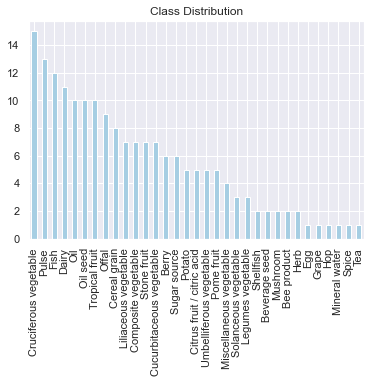

In [12]:
df['Group'].value_counts().plot(kind = 'bar', title = 'Class Distribution')

<AxesSubplot:title={'center':'Allergy Distribution'}>

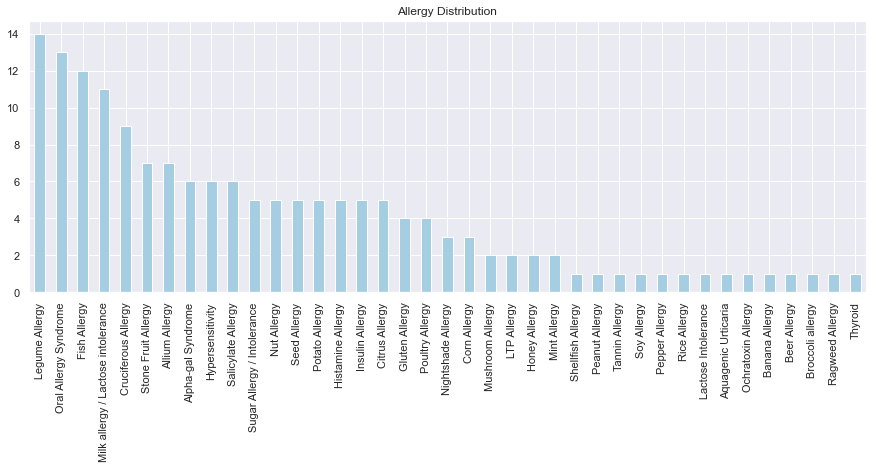

In [13]:
df['Allergy'].value_counts().plot(kind = 'bar', figsize = (15, 5), title = 'Allergy Distribution')

In [14]:
#Barcode Scanner
import cv2
from pyzbar import pyzbar

def read_barcodes(frame):
    barcodes = pyzbar.decode(frame)
    for barcode in barcodes:
        x, y , w, h = barcode.rect
        barcode_info = barcode.data.decode('utf-8')
        un1= str(barcode_info) 
        print(un1)
        df = pd.read_csv('FoodData.csv')
        print(df.loc[df['Food'] == un1 ])
        cv2.rectangle(frame, (x, y),(x+w, y+h), (0, 255, 0), 2)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, barcode_info, (x + 6, y - 6), font, 2.0, (255, 255, 255), 1)
        #3
        with open("barcode_result.txt", mode ='w') as file:
            file.write("Recognized Barcode:" + barcode_info)
    return frame

def main():
    #1
    camera = cv2.VideoCapture(0)
    ret, frame = camera.read()
    #2
    while ret:
        ret, frame = camera.read()
        frame = read_barcodes(frame)
        cv2.imshow('Barcode Scanner', frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break
    
    camera.release()
    cv2.destroyAllWindows()

if __name__ == '__main__':
    main()
    
#un1= str(barcode_info)    
#print(un1)


Apple
          Class   Type       Group   Food                Allergy
1  Plant origin  Fruit  Pome fruit  Apple  Oral Allergy Syndrome
Apple
          Class   Type       Group   Food                Allergy
1  Plant origin  Fruit  Pome fruit  Apple  Oral Allergy Syndrome
Apple
          Class   Type       Group   Food                Allergy
1  Plant origin  Fruit  Pome fruit  Apple  Oral Allergy Syndrome
Apple
          Class   Type       Group   Food                Allergy
1  Plant origin  Fruit  Pome fruit  Apple  Oral Allergy Syndrome
Apple
          Class   Type       Group   Food                Allergy
1  Plant origin  Fruit  Pome fruit  Apple  Oral Allergy Syndrome
Apple
          Class   Type       Group   Food                Allergy
1  Plant origin  Fruit  Pome fruit  Apple  Oral Allergy Syndrome
Apple
          Class   Type       Group   Food                Allergy
1  Plant origin  Fruit  Pome fruit  Apple  Oral Allergy Syndrome
Apple
          Class   Type       Group   Food 

In [15]:
df2 = pd.read_csv("Allergies.csv", usecols =["Allergy"])
d= widgets.Dropdown(options=df2['Allergy'])
display(d)
un2= str(d.value)
btn1=widgets.Button(description="Go")
display(btn1)
#Login
def go(b):
  print("User Information")
  df3 = pd.read_csv('Allergies.csv')
  df4 = df3.loc[df['Allergy'] == un2 ]
  print(df4)
btn1.on_click(go)

Dropdown(options=('Nut Allergy', 'Lactose Intolerance', 'Legume Allergy', 'Nightshade Allergy', 'Allium Allerg…

Button(description='Go', style=ButtonStyle())

User Information
       Allergy  Rashes  Swelling  Redness  Dizziness/Fainting  Sneezing  \
0  Nut Allergy       5         6        4                   9         8   

   SoreThroat  Nausea  StomachCramps  Diarrhoea  Vomiting  Anaphylaxis  LowBP  \
0          20      15             13          9         7            2      1   

   WateryEyes                                       FoodsToAvoid    Type  
0           1  almonds,walnuts,pecans,hazelnuts,pine nuts,\nl...  Common  


In [16]:
df5 = pd.read_csv('Allergies.csv')
df5.head()

,Allergy,Rashes,Swelling,Redness,Dizziness/Fainting,Sneezing,SoreThroat,Nausea,StomachCramps,Diarrhoea,Vomiting,Anaphylaxis,LowBP,WateryEyes,FoodsToAvoid,Type
0,Nut Allergy,5,6,4,9,8,20,15,13,9,7,2,1,1,"almonds,walnuts,pecans,hazelnuts,pine nuts,\nl...",Common
1,Lactose Intolerance,0,10,8,5,0,2,28,15,32,0,0,0,0,"milk, yogurt, cream, butter, cheese (including...",Common
2,Legume Allergy,13,20,7,19,11,5,8,7,5,0,3,0,2,"lentils, chickpeas, green peas",Rare
3,Nightshade Allergy,6,8,10,7,9,6,25,4,7,2,3,4,9,"white potatoes, tomatoes, eggplant",Rare
4,Allium Allergy,7,9,3,5,11,10,14,15,4,6,4,4,8,"nion, garlic, leeks, scallions",Common


In [19]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Allergy             33 non-null     object
 1   Rashes              33 non-null     int64 
 2   Swelling            33 non-null     int64 
 3   Redness             33 non-null     int64 
 4   Dizziness/Fainting  33 non-null     int64 
 5   Sneezing            33 non-null     int64 
 6   SoreThroat          33 non-null     int64 
 7   Nausea              33 non-null     int64 
 8   StomachCramps       33 non-null     int64 
 9   Diarrhoea           33 non-null     int64 
 10  Vomiting            33 non-null     int64 
 11  Anaphylaxis         33 non-null     int64 
 12  LowBP               33 non-null     int64 
 13  WateryEyes          33 non-null     int64 
 14  FoodsToAvoid        32 non-null     object
 15  Type                33 non-null     object
dtypes: int64(13), object(3)
memo

In [20]:
from sklearn.model_selection import train_test_split
X=df5[['Rashes','Swelling','Redness','Dizziness/Fainting','Sneezing','SoreThroat','Nausea','StomachCramps','Diarrhoea','Vomiting','Anaphylaxis','LowBP','WateryEyes']]
y = df5[['Type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=5, min_samples_leaf=3)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=42)

In [22]:
y_predict = clf_model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.5

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.5

In [26]:
target = list(df['Type'].unique())
feature_names = list(X.columns)

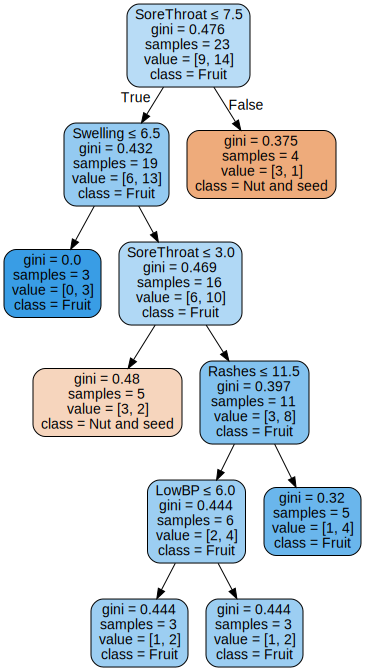

In [27]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_model,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph